# TRABALHO DE PROGRAMAÇÃO II

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.close("all")

## Base de Dados

### Dados Gerais

In [6]:
#tabela com os dados da base
hc = pd.read_csv("horse.csv")
hc['pain'].unique()

array(['extreme_pain', 'mild_pain', 'depressed', nan, 'severe_pain',
       'alert'], dtype=object)

In [7]:
hc.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [8]:
#colunas existentes
hc.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [9]:
hc.info()
#analisar a quantidade de dados em falta em cada coluna e o tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

### Dados Importantes

In [10]:
#tabela com os resultados mais confiáveis e necessários organizada de melhor forma, 
#para utilizar em tabelas/gráficos mais abaixo

#idade adulta é a partir dos 6 meses e jovem é com menos de 6 meses
#temperatura normal é 37,8
#pulso normal entre 20 e 40 para cavalos adultos
imp_data = hc.loc[1:298, ['age', 'rectal_temp', 'pulse', 'pain', 'abdominal_distention', 'surgical_lesion', 'outcome']]

imp_data

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
1,adult,39.2,88.0,mild_pain,slight,no,euthanized
2,adult,38.3,40.0,mild_pain,none,no,lived
3,young,39.1,164.0,depressed,severe,yes,died
4,adult,37.3,104.0,NaN,NaN,no,died
5,adult,NaN,NaN,depressed,slight,no,lived
...,...,...,...,...,...,...,...
294,adult,NaN,120.0,depressed,NaN,no,euthanized
295,adult,37.2,72.0,severe_pain,moderate,yes,euthanized
296,adult,37.5,72.0,severe_pain,moderate,yes,died
297,adult,36.5,100.0,mild_pain,moderate,yes,lived


In [11]:
imp_data.describe()
#método de encontrar as estatisticas das colunas numéricas

,rectal_temp,pulse
count,238.000000,274.000000
mean,38.167227,72.021898
std,0.734974,28.696330
min,35.400000,30.000000
25%,37.800000,48.000000
50%,38.200000,64.000000
75%,38.500000,88.000000
max,40.800000,184.000000


## Análise à Mortalidade nos Cavalos

In [12]:
#criar grupo com os dados do 'outcome', ou seja, se os cavalos morreram ou não
#frequencia!!!
#result =  hc.groupby(['outcome']).count()
#result

<AxesSubplot:title={'center':'mortality'}>

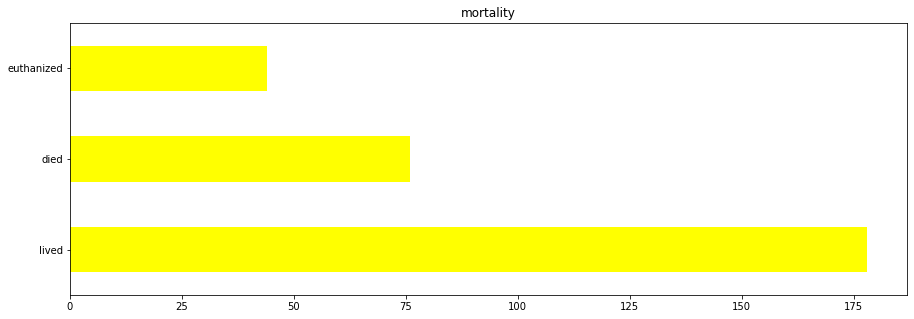

In [13]:
#gráfico com o numero de cavalos para cada resultado (morreu, viveu...)
fig, axs = plt.subplots(figsize=(15, 5))
imp_data.outcome.value_counts().plot.barh(title=("mortality"), color = "yellow")

### influência da temperatura na mortalidade e dor dos cavalos

In [14]:
#valores médios, minimos e máximos de temperatura
avgtemp = imp_data.rectal_temp.mean()
maxtemp = imp_data.rectal_temp.max()
mintemp = imp_data.rectal_temp.min()

print("A temperatura média é:", avgtemp)
print("A temperatura máxima registrada é:", maxtemp)
print("A temperatura mínima registrada é:", mintemp)

A temperatura média é: 38.16722689075633
A temperatura máxima registrada é: 40.8
A temperatura mínima registrada é: 35.4


In [15]:
#organizar as temperaturas da maior para a menor
temphierarq = imp_data.sort_values(by = "rectal_temp", ascending = False)

temphierarq.head(20)
#percebemos que todos os cavalos com temperatura superior a 40º faleceram
#4 dos 20 cavalos apresentam dores extremas(severas intermitentes) ou severas(severas contínuas)
#8 cavalos sobreviveram nos 20 com temperaturas mais altas

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
258,adult,40.8,72.0,depressed,none,yes,died
54,adult,40.3,114.0,depressed,moderate,yes,euthanized
91,adult,40.3,114.0,depressed,moderate,yes,died
280,adult,40.0,78.0,depressed,none,yes,died
20,adult,39.9,72.0,extreme_pain,severe,yes,lived
75,young,39.7,100.0,depressed,NaN,yes,euthanized
99,adult,39.6,108.0,depressed,moderate,no,lived
117,adult,39.5,NaN,mild_pain,moderate,yes,euthanized
230,adult,39.5,92.0,extreme_pain,none,no,died
161,adult,39.5,60.0,mild_pain,slight,no,lived


In [16]:
#organizar as temperaturas da menor para a maior
temphierarq1 = imp_data.sort_values(by = "rectal_temp", ascending = True)

temphierarq1.head(20)
#percebemos que as temperaturas frias são mais perigosas do que as febres
#7 dos 20 cavalos apresentam dores extremas ou severas
#6 cavalos sobreviveram nos 20 com temperaturas mais baixas

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
44,adult,35.4,140.0,severe_pain,NaN,yes,euthanized
140,adult,36.0,42.0,NaN,NaN,no,died
237,adult,36.1,88.0,mild_pain,slight,yes,euthanized
80,adult,36.4,98.0,severe_pain,slight,yes,died
118,adult,36.5,78.0,extreme_pain,none,yes,lived
297,adult,36.5,100.0,mild_pain,moderate,yes,lived
250,adult,36.6,42.0,alert,none,yes,died
113,adult,36.8,60.0,NaN,NaN,yes,died
276,adult,36.9,50.0,alert,slight,no,lived
291,adult,37.0,66.0,severe_pain,moderate,yes,died


In [17]:
#média de temperaturas para cada outcome
temp_out = imp_data.groupby('outcome')
med_outtemp = temp_out['outcome', 'rectal_temp'].mean()

med_outtemp
#com o gráfico abaixo percebemos que a temperatura não é dos principais influenciadores da morte dos cavalos,
#no entanto as temperaturas frias são mais perigosas que as quentes, causando mais dor
#concluimos que as colicas não têm como principal sintoma as mudanças de temperatura, mas estas influenciam no bem estar do animal.

C:\Users\RONYLU~1\AppData\Local\Temp/ipykernel_2988/2300635601.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  med_outtemp = temp_out['outcome', 'rectal_temp'].mean()


,rectal_temp
outcome,
died,38.173077
euthanized,38.052941
lived,38.190789


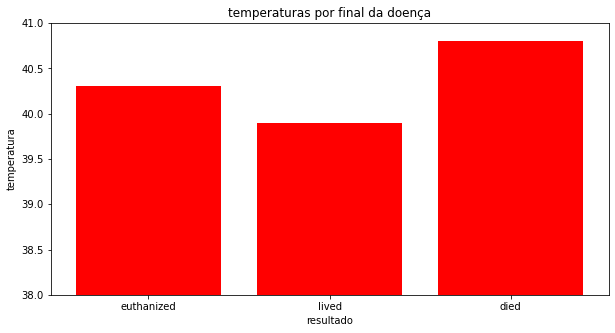

In [18]:
#relação entre o estado final dos cavalos e as temperaturas para cada um dos finais(morrer, sobreviver, ...)
#criar as variáveis que vão ser relacionadas: temperatura no reto e outcome
rectal_temp = imp_data ['rectal_temp'].tolist()
outcome = imp_data ['outcome'].tolist()

#No eixo do x encontra-se o estado final dos cavalos, no eixo do y as temperaturas 
#e escolhemos a cor vermelha para as barras
fig, axs = plt.subplots(figsize=(10, 5))
plt.bar(outcome, rectal_temp, color = 'red') 
plt.ylabel("temperatura") #nome do eixo vertical, eixo do y
plt.xlabel("resultado") #nome do eixo horizontal, eixo do x
plt.ylim(38,41) #mudar a escala do eixo y
plt.title('temperaturas por final da doença') #título do gráfico
plt.show()

### Relação da Distenção Abdominal com a Mortalidade e com a Dor

In [19]:
#numero de cavalos com cada tipo de distenção abdominal
abddist = hc['abdominal_distention'].value_counts() #count dos valores de distenção abdominal

abddist

none        75
slight      65
moderate    65
severe      38
Name: abdominal_distention, dtype: int64

In [20]:
#dados dos cavalos com distenção abdominal severa
abd_tab = imp_data.groupby('abdominal_distention')
abd_severe = abd_tab.get_group('severe')

abd_severe.head(20)
#em 20 cavalos 7 sobreviveram
#a maioria dos cavalos tem dor extrema ou severa (11 dos 20)

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
3,young,39.1,164.0,depressed,severe,yes,died
8,adult,NaN,80.0,severe_pain,severe,yes,euthanized
20,adult,39.9,72.0,extreme_pain,severe,yes,lived
30,adult,37.7,96.0,extreme_pain,severe,yes,died
34,adult,NaN,100.0,extreme_pain,severe,yes,lived
43,adult,NaN,120.0,severe_pain,severe,yes,euthanized
45,adult,NaN,120.0,extreme_pain,severe,yes,died
46,adult,37.9,60.0,extreme_pain,severe,yes,lived
55,young,38.6,160.0,mild_pain,severe,yes,died
59,adult,NaN,96.0,extreme_pain,severe,yes,died


In [21]:
#dados dos cavalos com distenção abdominal moderada
abd_mod = abd_tab.get_group('moderate')

abd_mod.head(20)
#em 20 cavalos 7 sobreviveram
#a maioria dos cavalos tem dor extrema(7), alguns têm dor severa(2)

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
6,adult,37.9,48.0,mild_pain,moderate,yes,lived
12,adult,37.2,42.0,mild_pain,moderate,no,lived
15,adult,37.6,96.0,extreme_pain,moderate,yes,died
16,young,NaN,128.0,severe_pain,moderate,no,died
19,adult,39.4,110.0,NaN,moderate,no,lived
24,adult,38.1,60.0,NaN,moderate,yes,lived
26,adult,38.3,72.0,mild_pain,moderate,yes,lived
32,adult,37.2,60.0,mild_pain,moderate,yes,lived
35,adult,NaN,104.0,severe_pain,moderate,yes,euthanized
40,adult,NaN,88.0,extreme_pain,moderate,yes,died


In [22]:
#dados dos cavalos com distenção abdominal ligeira
abd_lig = abd_tab.get_group('slight')

abd_lig.head(20)
#em 20 cavalos 13 sobreviveram
#a maioria dos cavalos tem dor muito ligeira ou baixa (16 dos 20)
#percebemos que a distenção abdominal está ligada tanto à dor sentida como à taxa de sobrevivência

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
1,adult,39.2,88.0,mild_pain,slight,no,euthanized
5,adult,NaN,NaN,depressed,slight,no,lived
7,adult,NaN,60.0,NaN,slight,yes,died
11,adult,39.1,72.0,depressed,slight,yes,lived
13,young,38.0,92.0,alert,slight,no,died
27,adult,37.8,48.0,NaN,slight,no,lived
31,adult,37.2,108.0,depressed,slight,yes,euthanized
38,adult,38.6,52.0,mild_pain,slight,no,lived
49,adult,37.2,84.0,severe_pain,slight,no,died
50,adult,38.6,46.0,alert,slight,no,lived


### Relação Entre Dor e Mortalidade

In [23]:
#numero de cavalos com cada grau de dor
dorcnt = hc['pain'].value_counts()

dorcnt

mild_pain       67
depressed       59
extreme_pain    42
severe_pain     38
alert           38
Name: pain, dtype: int64

In [24]:
#dados dos cavalos com distenção abdominal ligeira
dortab = imp_data.groupby('pain')
dormild = dortab.get_group('mild_pain')

dormild.head(20)
#em 20 cavalos 15 sobreviveram

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
1,adult,39.2,88.0,mild_pain,slight,no,euthanized
2,adult,38.3,40.0,mild_pain,none,no,lived
6,adult,37.9,48.0,mild_pain,moderate,yes,lived
10,adult,38.1,66.0,mild_pain,none,yes,lived
12,adult,37.2,42.0,mild_pain,moderate,no,lived
14,adult,38.2,76.0,mild_pain,none,yes,lived
26,adult,38.3,72.0,mild_pain,moderate,yes,lived
32,adult,37.2,60.0,mild_pain,moderate,yes,lived
33,adult,38.2,64.0,mild_pain,NaN,yes,lived
38,adult,38.6,52.0,mild_pain,slight,no,lived


In [25]:
#dados dos cavalos com distenção abdominal ligeira
dordep = dortab.get_group('depressed')

dordep.head(20)
#em 20 cavalos 12 sobreviveram

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
3,young,39.1,164.0,depressed,severe,yes,died
5,adult,NaN,NaN,depressed,slight,no,lived
11,adult,39.1,72.0,depressed,slight,yes,lived
18,adult,37.6,64.0,depressed,none,yes,lived
22,adult,38.6,42.0,depressed,none,yes,lived
23,young,38.3,130.0,depressed,NaN,yes,lived
31,adult,37.2,108.0,depressed,slight,yes,euthanized
48,adult,38.9,80.0,depressed,moderate,yes,died
54,adult,40.3,114.0,depressed,moderate,yes,euthanized
60,adult,37.8,48.0,depressed,NaN,no,lived


In [26]:
#dados dos cavalos com distenção abdominal ligeira
dorext = dortab.get_group('extreme_pain')

dorext.head(20)
#em 20 cavalos 8 sobreviveram

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
9,young,38.3,90.0,extreme_pain,none,no,lived
15,adult,37.6,96.0,extreme_pain,moderate,yes,died
20,adult,39.9,72.0,extreme_pain,severe,yes,lived
30,adult,37.7,96.0,extreme_pain,severe,yes,died
34,adult,NaN,100.0,extreme_pain,severe,yes,lived
37,adult,37.8,72.0,extreme_pain,none,yes,lived
40,adult,NaN,88.0,extreme_pain,moderate,yes,died
45,adult,NaN,120.0,extreme_pain,severe,yes,died
46,adult,37.9,60.0,extreme_pain,severe,yes,lived
57,adult,NaN,64.0,extreme_pain,moderate,yes,died


In [27]:
#dados dos cavalos com distenção abdominal ligeira
dorsev = dortab.get_group('severe_pain')

dorsev.head(20)
#em 20 cavalos 3 sobreviveram
#percebemos que a dor está extremamente ligada ao estágio da doença e à sua mortalidade
#a dor é um dos sintomas mais preocupantes da doença

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
8,adult,NaN,80.0,severe_pain,severe,yes,euthanized
16,young,NaN,128.0,severe_pain,moderate,no,died
35,adult,NaN,104.0,severe_pain,moderate,yes,euthanized
43,adult,NaN,120.0,severe_pain,severe,yes,euthanized
44,adult,35.4,140.0,severe_pain,NaN,yes,euthanized
49,adult,37.2,84.0,severe_pain,slight,no,died
73,adult,38.1,52.0,severe_pain,none,yes,died
80,adult,36.4,98.0,severe_pain,slight,yes,died
104,adult,37.8,52.0,severe_pain,none,yes,died
108,adult,38.7,60.0,severe_pain,severe,yes,euthanized


### Relação Entre ter Lesões Cirurgicas e Mortalidade

<AxesSubplot:title={'center':'lesões causadas por cirurgia'}>

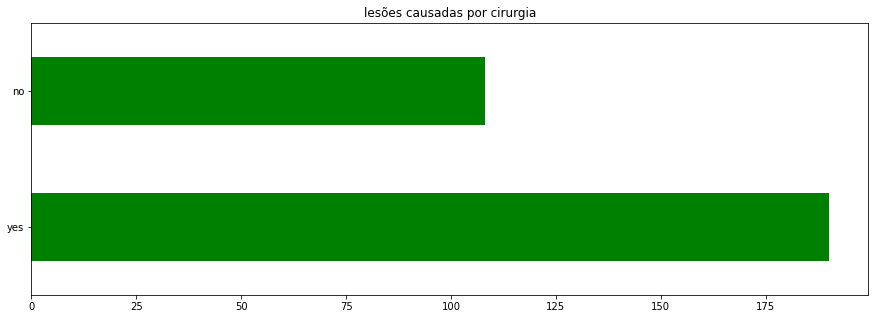

In [28]:
#cavalos com lesão cirurgica
fig, axs = plt.subplots(figsize=(15, 5))
imp_data.surgical_lesion.value_counts().plot.barh(stacked = False, title=("lesões causadas por cirurgia"), color = "green")

In [29]:
#dados dos cavalos com lesões cirurgicas
lestab = imp_data.groupby('surgical_lesion')
yes = lestab.get_group('yes')

yes.head(20)
#em 20 cavalos 13 sobreviveram

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
3,young,39.1,164.0,depressed,severe,yes,died
6,adult,37.9,48.0,mild_pain,moderate,yes,lived
7,adult,NaN,60.0,NaN,slight,yes,died
8,adult,NaN,80.0,severe_pain,severe,yes,euthanized
10,adult,38.1,66.0,mild_pain,none,yes,lived
11,adult,39.1,72.0,depressed,slight,yes,lived
14,adult,38.2,76.0,mild_pain,none,yes,lived
15,adult,37.6,96.0,extreme_pain,moderate,yes,died
18,adult,37.6,64.0,depressed,none,yes,lived
20,adult,39.9,72.0,extreme_pain,severe,yes,lived


In [30]:
#dados dos cavalos sem lesões cirurgicas
no = lestab.get_group('no')

no.head(20)
#em 20 cavalos 14 sobreviveram
#as lesões cirurgicas são mais fácilmente tratadas caso não tenham outras complicações, não são uma principal causa de morte

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
1,adult,39.2,88.0,mild_pain,slight,no,euthanized
2,adult,38.3,40.0,mild_pain,none,no,lived
4,adult,37.3,104.0,NaN,NaN,no,died
5,adult,NaN,NaN,depressed,slight,no,lived
9,young,38.3,90.0,extreme_pain,none,no,lived
12,adult,37.2,42.0,mild_pain,moderate,no,lived
13,young,38.0,92.0,alert,slight,no,died
16,young,NaN,128.0,severe_pain,moderate,no,died
17,adult,37.5,48.0,NaN,NaN,no,lived
19,adult,39.4,110.0,NaN,moderate,no,lived


### relação entre dor e temperatura 

In [31]:
result = hc.groupby('pain').mean()

result
#result agrupado pela média

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
pain,,,,,,,,,,,
alert,6.566148e+05,38.094444,50.081081,21.419355,6.175000,41.770270,29.018919,4.542857,1185.473684,187.131579,0.0
depressed,9.346567e+05,38.452000,80.859649,33.192308,4.755556,49.087719,27.516071,3.209091,4352.305085,23.728814,0.0
extreme_pain,1.097465e+06,38.165217,87.114286,31.620690,4.225000,51.102564,19.070270,2.276923,4924.285714,219.595238,0.0
mild_pain,1.027950e+06,38.100000,63.876923,27.775862,4.066667,42.056452,22.809375,3.477778,3237.119403,46.432836,0.0
severe_pain,1.155507e+06,37.928571,83.676471,32.366667,5.333333,49.250000,23.030000,2.665000,4244.342105,81.894737,0.0


Text(0.5, 1.0, 'dor por temperatura média')

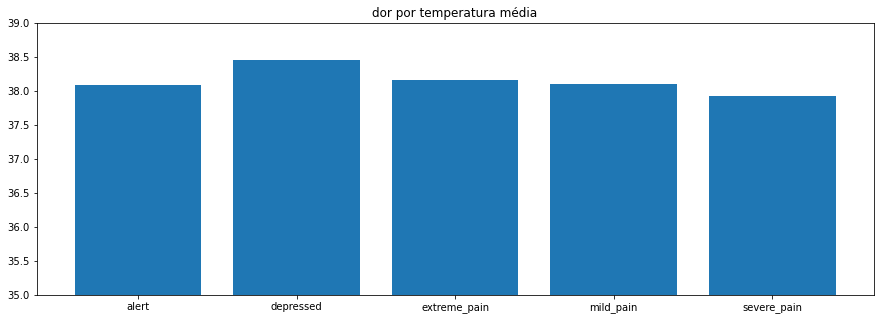

In [32]:
#comparação entre a média de temperaturas e a dor sentida
fig, axs = plt.subplots(figsize=(15, 5))
plt.bar(result.index, result.rectal_temp)
plt.ylim(35,39)
plt.title("dor por temperatura média")
#percebe-se que as dores mais severas têm tendencia a ser causadas por temperaturas mais baixas
#(alerta é quando não se nota que o cavalo está em dor)

In [49]:
above_35 = imp_data[imp_data['rectal_temp'] < 37] #quantidade de cavalos com menos de 37º

above_35.head(298)

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
44,adult,35.4,140.0,severe_pain,NaN,yes,euthanized
80,adult,36.4,98.0,severe_pain,slight,yes,died
113,adult,36.8,60.0,NaN,NaN,yes,died
118,adult,36.5,78.0,extreme_pain,none,yes,lived
140,adult,36.0,42.0,NaN,NaN,no,died
237,adult,36.1,88.0,mild_pain,slight,yes,euthanized
250,adult,36.6,42.0,alert,none,yes,died
276,adult,36.9,50.0,alert,slight,no,lived
297,adult,36.5,100.0,mild_pain,moderate,yes,lived


In [51]:
above_35 = imp_data[imp_data['rectal_temp'] > 37] #quantidade de cavalos com mais de 37º

above_35.head(298)
#percebe-se que as colicas causam principalmente febres, temos muitos menos cavalos com temperaturas baixaas que altas

,age,rectal_temp,pulse,pain,abdominal_distention,surgical_lesion,outcome
1,adult,39.2,88.0,mild_pain,slight,no,euthanized
2,adult,38.3,40.0,mild_pain,none,no,lived
3,young,39.1,164.0,depressed,severe,yes,died
4,adult,37.3,104.0,NaN,NaN,no,died
6,adult,37.9,48.0,mild_pain,moderate,yes,lived
...,...,...,...,...,...,...,...
290,adult,38.9,80.0,depressed,moderate,yes,died
293,adult,38.5,40.0,depressed,none,no,lived
295,adult,37.2,72.0,severe_pain,moderate,yes,euthanized
296,adult,37.5,72.0,severe_pain,moderate,yes,died


### Relação Entre Pulsação e Mortalidade

In [33]:
#média de ritmo cardíaco para cada outcome
temp_out = imp_data.groupby('outcome')
med_pultemp = temp_out['outcome', 'pulse'].mean()

med_pultemp

C:\Users\RONYLU~1\AppData\Local\Temp/ipykernel_2988/4023791696.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  med_pultemp = temp_out['outcome', 'pulse'].mean()


,pulse
outcome,
died,87.553846
euthanized,81.744186
lived,63.421687


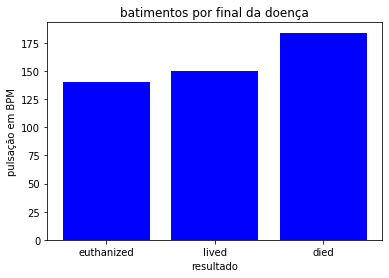

In [34]:
#relação entre o estado final dos cavalos e a pulsação para cada um dos finais(morrer, sobreviver, ...)
#criar as variáveis que vão ser relacionadas: pulse e outcome
pulse = imp_data ['pulse'].tolist()
outcome = imp_data ['outcome'].tolist()

#No eixo do x encontra-se o estado final dos cavalos, no eixo do y a pulsação
#e escolhemos a cor azul para as barras
plt.bar(outcome, pulse, color = 'blue')
plt.ylabel("pulsação em BPM") #nome do eixo vertical, eixo do y
plt.xlabel("resultado") #nome do eixo horizontal, eixo do x
plt.title('batimentos por final da doença') #título do gráfico
plt.show()
#podemos observar que entre todas as variáveis a que parece influenciar mais o desfecho da doença das cólicas é a pulsação
#entre a média dos cavalos que são mortos/eutanaziados e a dos que sobrevivem há uma diferença de cerca de 20 BPM

### Relação Entre a Idade dos Cavalos e a Mortalidade

In [35]:
#numero de cavalos por idade
agecnt = imp_data['age'].value_counts()

agecnt
#variável menos confiável que as outras 5, devido a ter uma grande diferença de população entre as duas hipóteses,jovens e adultos

adult    274
young     24
Name: age, dtype: int64